# Initial Exploration of Van der Waals Constants Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from urllib.request import urlopen
from urllib.parse import quote

Our dataset is a collection of atomic signatures and their corresponding a and b values.

In [3]:
url = 'https://huggingface.co/datasets/BlakeMilstea/Van_Der_Waals_Constants/raw/main/Van_Der_Waals_Constants%20-%20Sheet1%20(1).csv'

data = pd.read_csv(url)
data.columns = ['sci_name', 'name', 'a', 'b']

data.head()

,sci_name,name,a,b
0,AlCl3,Aluminum trichloride,42.630,0.245
1,NH3,Ammonia,4.225,0.03713
2,NH4Cl,Ammonium chloride,2.380,0.00734
3,Ar,Argon,1.355,0.03201
4,BCl3,Boron trichloride,15.600,0.1222


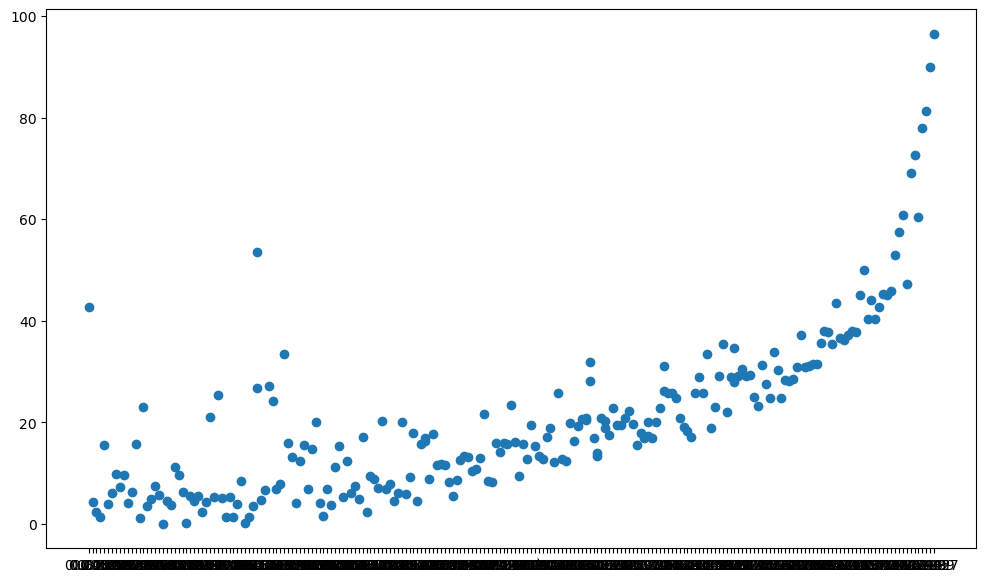

In [4]:
plt.figure(figsize=(12,7))

plt.scatter(data['b'], data['a'])

plt.show()

In [5]:
def name_to_SMILES(mol):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(mol) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return float('nan')

In [6]:
smiles_names = []

for i in range(len(data)):
    smiles_names.append(name_to_SMILES(data['name'][i]))

data = data.assign(smile=smiles_names)

data = data.dropna().reset_index(drop=True)

data.head()

,sci_name,name,a,b,smile
0,AlCl3,Aluminum trichloride,42.630,0.245,[Al+3].[Cl-].[Cl-].[Cl-]
1,NH3,Ammonia,4.225,0.03713,N
2,NH4Cl,Ammonium chloride,2.380,0.00734,[NH4+].[Cl-]
3,Ar,Argon,1.355,0.03201,[Ar]
4,BCl3,Boron trichloride,15.600,0.1222,ClB(Cl)Cl


In [7]:
from rdkit import Chem

In [8]:
for mol in data['smile']:
    m = Chem.MolFromSmiles(mol)
    if m is None: continue
    a = m.GetNumAtoms()
    print(a)

4
1
2
1
4
4
2
1
2
1
5
1
5
4
4
6
1
1
1
1
2
1
1
1
1
1
1
1
1
5
5
5
1
3
1
3
2
1
1
3
1
1
1
1
3
7
1
7
1
3
5
5
5
5
5
2
3
3
3
4
4
3
3
2
2
4
1
2
2
2
8
6
4
2
4
5
5
3
2
4
4
3
4
4
3
3
3
2
3
3
3
3
3
3
11
4
3
3
4
4
5
5
5
4
3
4
4
4
4
4
4
5
5
5
4
7
5
4
4
5
5
6
6
6
6
6
5
4
4
5
5
5
5
5
5
5
5
7
6
5
5
5
5
5
6
7
7
7
7
7
6
5
5
5
6
7
7
7
7
6
7
7
7
7
6
7
8
8
8
8
8
6
6
7
7
7
8
8
7
8
8
8
8
8
7
8
8
8
8
8
9
9
8
8
9
10
9
9
9
9
9
10
10
10
10
10
10
10
10
10
11
11
12
12
13
13
13
14
15
15


[14:11:42] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[14:11:42] Explicit valence for atom # 1 Cl, 5, is greater than permitted
[14:11:42] WARNING: not removing hydrogen atom without neighbors
[14:11:42] SMILES Parse Error: syntax error while parsing: [F]|[U](|[F])(|[F])(|[F])(|[F])|[F]
[14:11:42] SMILES Parse Error: Failed parsing SMILES '[F]|[U](|[F])(|[F])(|[F])(|[F])|[F]' for input: '[F]|[U](|[F])(|[F])(|[F])(|[F])|[F]'
